# **Midterm project : Experiment2**
> #### Programming for Applied Deep Learning (GKSG008-01)
> #### 20181202 김수미 / (Team with: Stephan Isabel)

> Use the whole of dataset (10 dimensional data).

## **2-1. Modify the code from sklearn, do the experiemnt, plot some figures that you think useful to present the result.**

**1. Import Libraries and Define Function**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data
from torch import nn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

**2. Generate Dataset**

In [2]:
X, Y = datasets.load_diabetes(return_X_y=True)
Y = Y.reshape(442,1)

**3. Split data : Training & Testing**

In [3]:
X_train = X[:-20]
Y_train = Y[:-20]

X_test = X[-20:]
Y_test = Y[-20:]

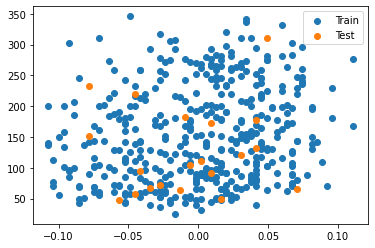

In [4]:
graph = plt.scatter(X_train[:, 0], Y_train, label='Train'),
plt.scatter(X_test[:, 0], Y_test, label='Test'),
plt.legend()
plt.show(graph)

**4. Create and Train Model**

In [5]:
# Create Model
regr = linear_model.LinearRegression()

# Train Model
regr.fit(X_train, Y_train)
sk_pred = regr.predict(X_test)

**5. Training Results**

In [6]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, sk_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Y_test, sk_pred))

Coefficients: 
 [[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
  -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
   7.43519617e+02  7.60951722e+01]]
Mean squared error: 2004.57
Coefficient of determination: 0.59


**5. Plot the Results**

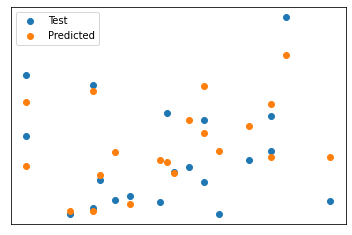

In [7]:
# Test dataset
graph = plt.scatter(X_test[:, 0], Y_test, label='Test'),
plt.scatter(X_test[:, 0], sk_pred, label='Predicted'),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)

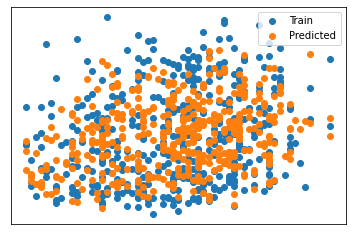

In [8]:
# Train dataset
sk_train_pred = regr.predict(X_train)
graph = plt.scatter(X_train[:, 0], Y_train, label='Train'),
plt.scatter(X_train[:, 0], sk_train_pred, label='Predicted'),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)

## **2-2 Modify your pytorch code, do the experiment, plot figures.**

**1. Define Function**

In [9]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

**3. Change 'numpy.ndarray' to 'torch.tensor'**

In [10]:
# Train data
X_train = torch.from_numpy(X_train)
Y_train = torch.from_numpy(Y_train)
X_train,Y_train = X_train.type(torch.FloatTensor),Y_train.type(torch.FloatTensor)

In [11]:
# Test data
X_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(Y_test)
X_test,Y_test = X_test.type(torch.FloatTensor),Y_test.type(torch.FloatTensor)

**4. Set Parameters and Neural Network**

In [12]:
true_w = torch.tensor([2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])
true_b = 4.2
batch_size = 10
data_iter = load_array((X_train, Y_train), batch_size)

In [13]:
net = nn.Sequential(nn.Linear(in_features=10, out_features=1))
loss = nn.MSELoss() 
trainer = torch.optim.SGD(net.parameters(), lr=0.09)

**4. Train the Model**

In [14]:
loss_results = []
w_list = []
b_list = []

num_epochs = 100
for epoch in range(num_epochs):
    for X, Y in data_iter:
        ypred = net(X)
        mseloss = loss(ypred, Y)
        loss_results.append(mseloss.item())
        trainer.zero_grad()
        mseloss.backward()
        trainer.step()
        w = net[0].weight.data
        b = net[0].bias.data.item()
        w_list.append(w[0][0].item())
        b_list.append(b)
        l = loss(net(X_train), Y_train)
    if epoch % 10 == 9:
      print(f'epoch {epoch + 1}, loss {l:f}')

epoch 10, loss 4587.325195
epoch 20, loss 3705.187744
epoch 30, loss 3421.776855
epoch 40, loss 3230.812256
epoch 50, loss 3131.213867
epoch 60, loss 3067.089111
epoch 70, loss 3148.062012
epoch 80, loss 3003.322510
epoch 90, loss 3144.085938
epoch 100, loss 3009.993164


**4. Training Results**

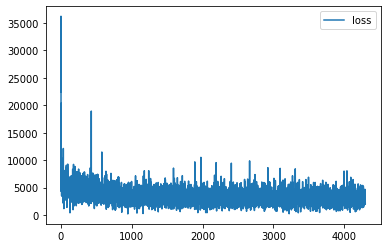

In [15]:
graph = plt.plot(loss_results,label='loss'), plt.legend()
plt.show(graph)

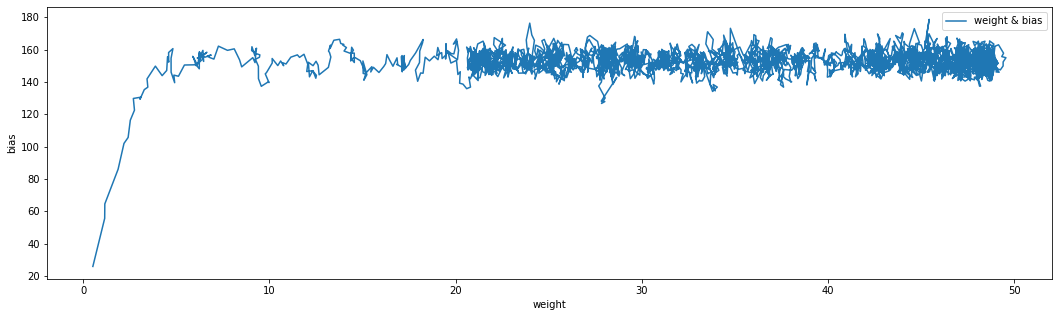

In [16]:
plt.figure(figsize=(18,5))
graph = plt.plot(w_list, b_list, label='weight & bias'), plt.legend(),
plt.xlabel('weight'), plt.ylabel('bias')
plt.show(graph)

In [17]:
torch_pred = net(X_test)
torch_pred = torch_pred.detach().numpy()
# Mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, torch_pred))
# Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Y_test, torch_pred))

Mean squared error: 2033.26
Coefficient of determination: 0.58


**5. Plot the Results**

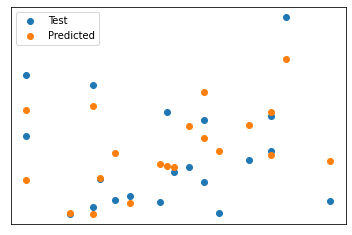

In [18]:
# Test dataset
graph = plt.scatter(X_test[:, 0], Y_test, label='Test'),
plt.scatter(X_test[:, 0], torch_pred, label='Predicted'),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)

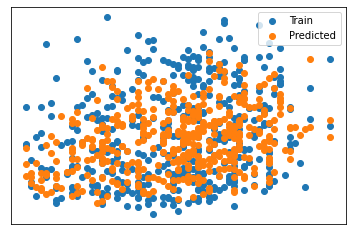

In [19]:
# Train dataset
torch_train_pred = net(X_train)
torch_train_pred = torch_train_pred.detach().numpy()
graph = plt.scatter(X_train[:, 0], Y_train, label='Train'),
plt.scatter(X_train[:, 0], torch_train_pred, label='Predicted'),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)

## **2-3. Provide a comparison of the the two experiments.**

In [20]:
# sklearn
print("< sklearn >")
print('Mean squared error: %.2f' % mean_squared_error(Y_test, sk_pred))
print('Coefficient of determination: %.2f' % r2_score(Y_test, sk_pred))

# pytorch
print("\n< Pytorch >")
print('Mean squared error: %.2f' % mean_squared_error(Y_test, torch_pred))
print('Coefficient of determination: %.2f' % r2_score(Y_test, torch_pred))

< sklearn >
Mean squared error: 2004.57
Coefficient of determination: 0.59

< Pytorch >
Mean squared error: 2033.26
Coefficient of determination: 0.58


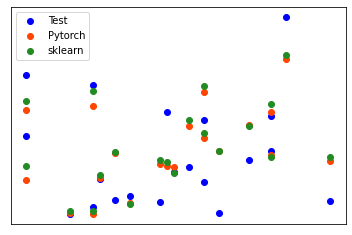

In [21]:
# Test dataset
graph = plt.scatter(X_test[:, 0], Y_test, color='blue', label='Test'),
plt.scatter(X_test[:, 0], torch_pred, color='orangered', label='Pytorch'),
plt.scatter(X_test[:, 0], sk_pred, color='forestgreen', label='sklearn'),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)

In [22]:
# Calculate gap between true values and predicted values
pytorch_testGap = []
sklearn_testGap = []
idx = []
for i in Y_test:
  for j in torch_pred:
    pytorch_testGap.append(abs(i.item()-j.item()))
    break
for i in Y_test:
  for j in sk_pred:
    sklearn_testGap.append(abs(i.item()-j.item()))
    break
for i in range(len(Y_test)):
  idx.append(i+1)

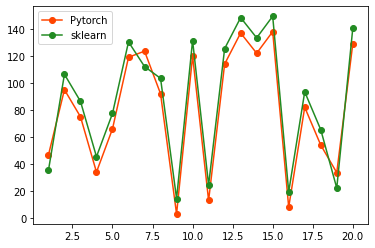

In [23]:
# Plot gap between true values and predicted values
graph = plt.plot(idx, pytorch_testGap, color='orangered', label='Pytorch', marker='o'),
plt.plot(idx, sklearn_testGap, color='forestgreen', label='sklearn', marker='o'),
plt.legend()
plt.show(graph)

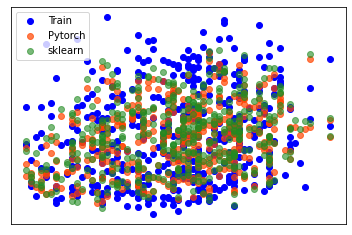

In [24]:
# Train dataset
graph = plt.scatter(X_train[:, 0], Y_train, color='blue', label='Train'),
plt.scatter(X_train[:, 0], torch_train_pred, color='orangered', label='Pytorch', alpha = 0.7),
plt.scatter(X_train[:, 0], sk_train_pred, color='forestgreen', label='sklearn', alpha = 0.6),
plt.xticks(()), plt.yticks(()), plt.legend()
plt.show(graph)

In [25]:
# Calculate gap between true values and predicted values
pytorch_trainGap = []
sklearn_trainGap = []
idx = []
for i in Y_train:
  for j in torch_train_pred:
    pytorch_trainGap.append(abs(i.item()-j.item()))
    break
for i in Y_train:
  for j in sk_train_pred:
    sklearn_trainGap.append(abs(i.item()-j.item()))
    break
for i in range(len(Y_train)):
  idx.append(i+1)

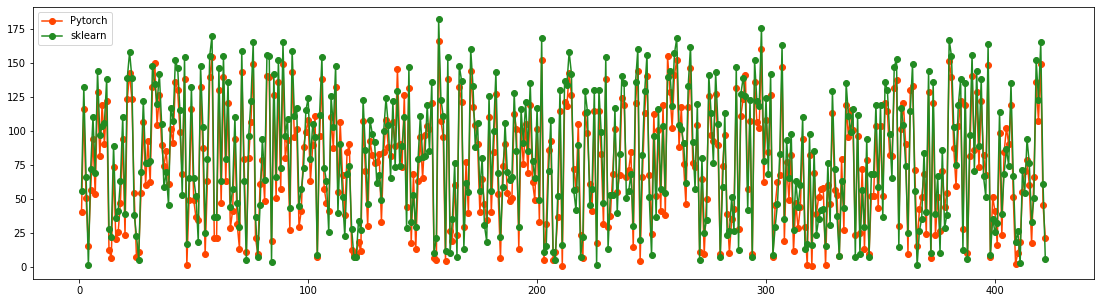

In [27]:
# Plot gap between true values and predicted values
plt.figure(figsize=(19,5))
graph = plt.plot(idx, pytorch_trainGap, color='orangered', label='Pytorch', marker='o'),
plt.plot(idx, sklearn_trainGap, color='forestgreen', label='sklearn', marker='o'),
plt.legend()
plt.show(graph)

## **2-4. Provide pros and cons.**

### **1) Scikit-learn**

> **Pros :**

> The training result was a bit more accurate than that of Pytorch.(sometimes)

> The process of creatin training model is very simple.

> Doesn't have to set weight and bias parameters

> **Cons :**

> Hard to see the detailed process of training.

> Hard to understand how training and learning is working.

<br>

### **2) Pytorch**

> **Pros :**

> Easy to see the detailed process of training.

> Easy to understand how training and learning is working(SGD and mseloss.backward).

> Can see how weight and bias values have been updated, and how the loss value has chaged.

> **Cons :**

> Creatin and training model needs more code lines than sklearn.

> Model traing part isn't been automated, compare to sklearn.

> The training result was a bit less accurate than that of sklearn.(sometimes)
